<a href="https://colab.research.google.com/github/simionattovini/hydraulic-machines/blob/main/Test%20Solutions/MH_PO_1S2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Hidráulicas - PO - 1S2024

## Enunciado

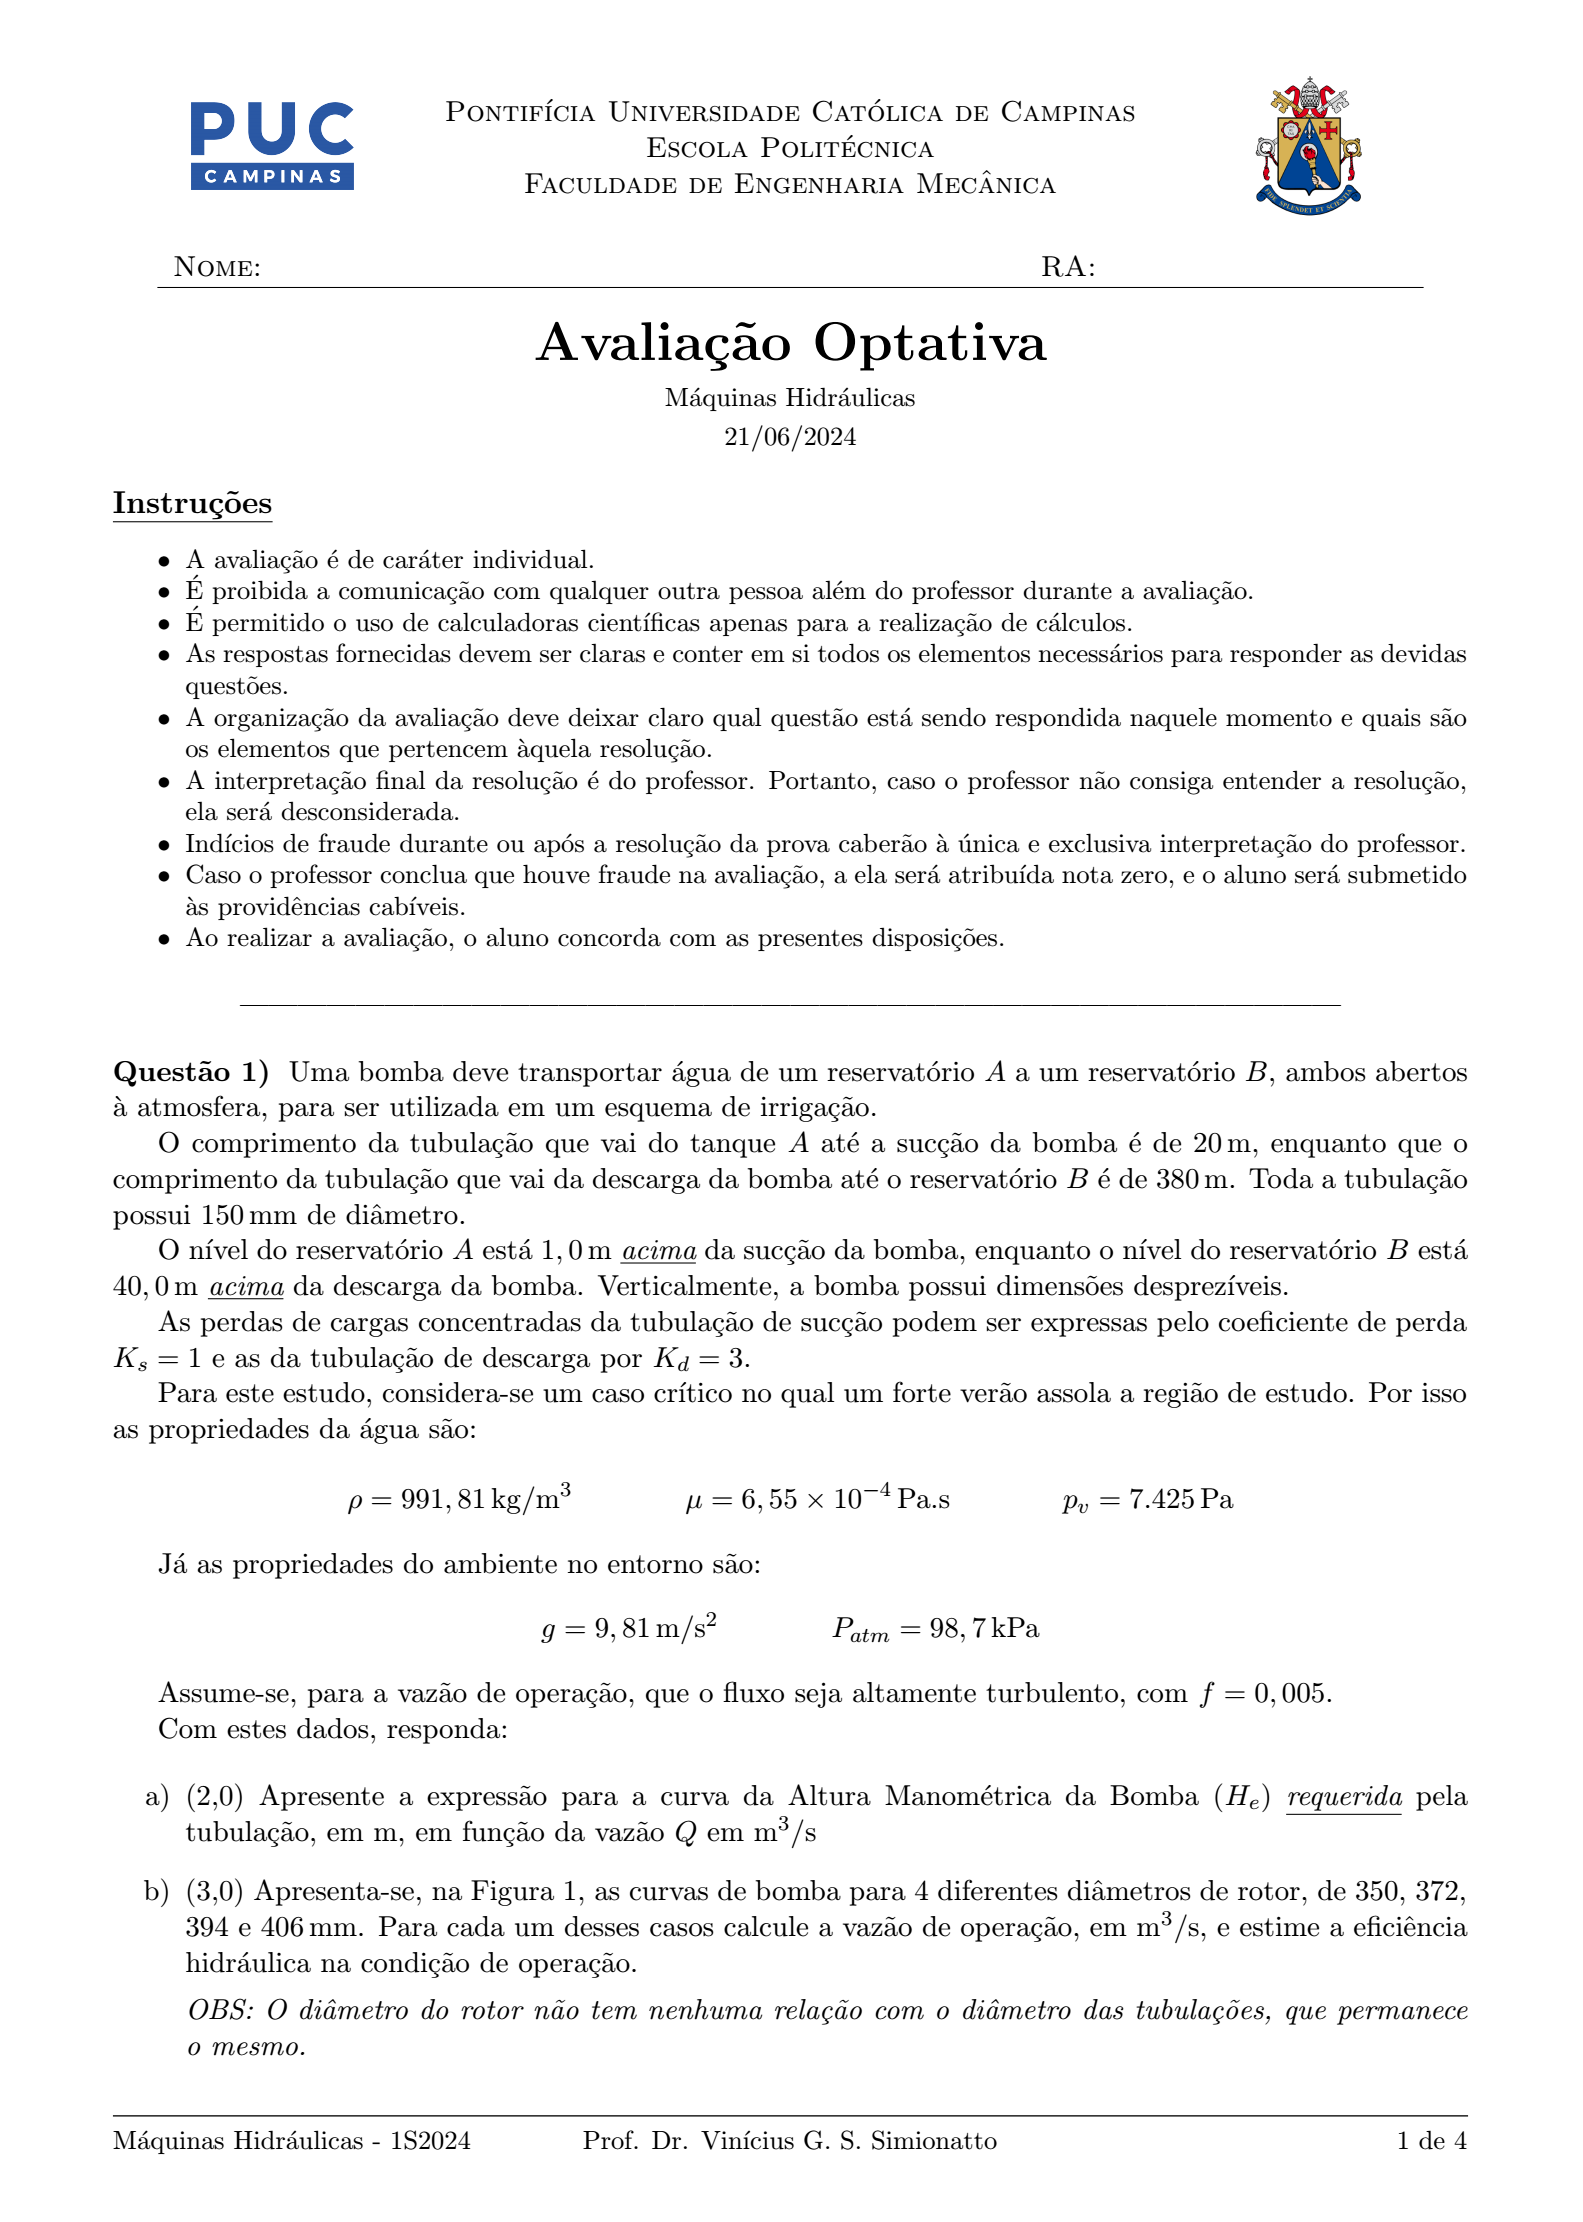

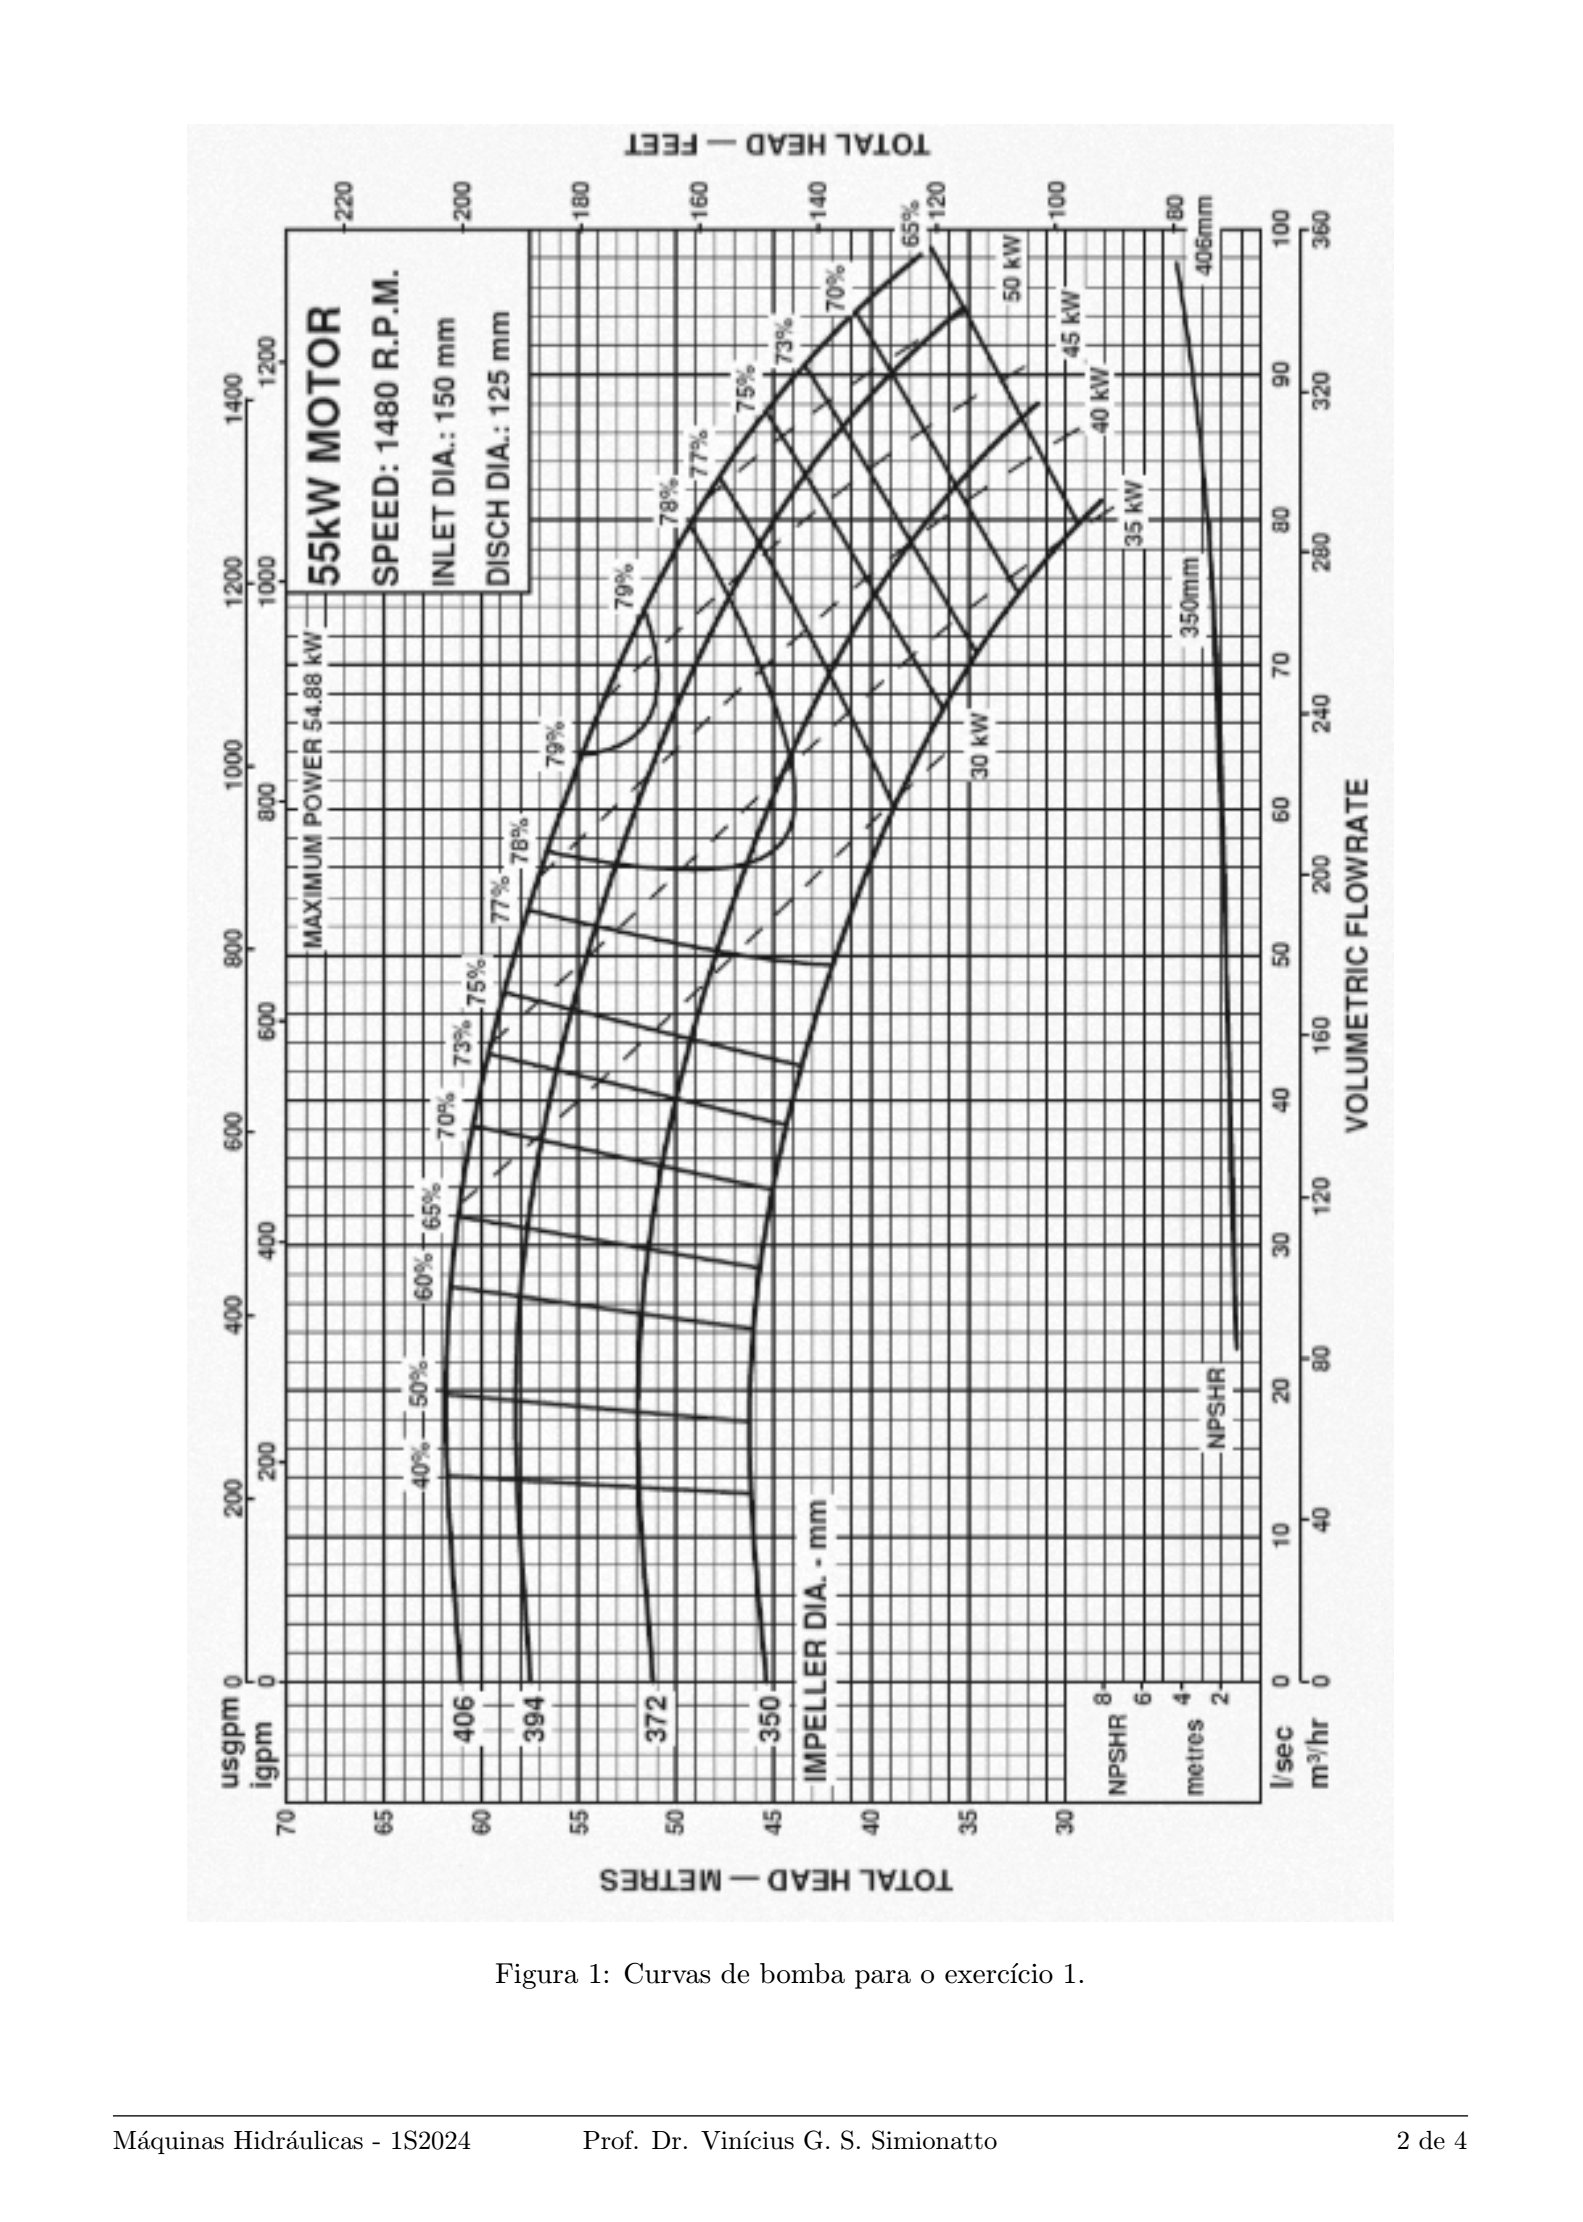

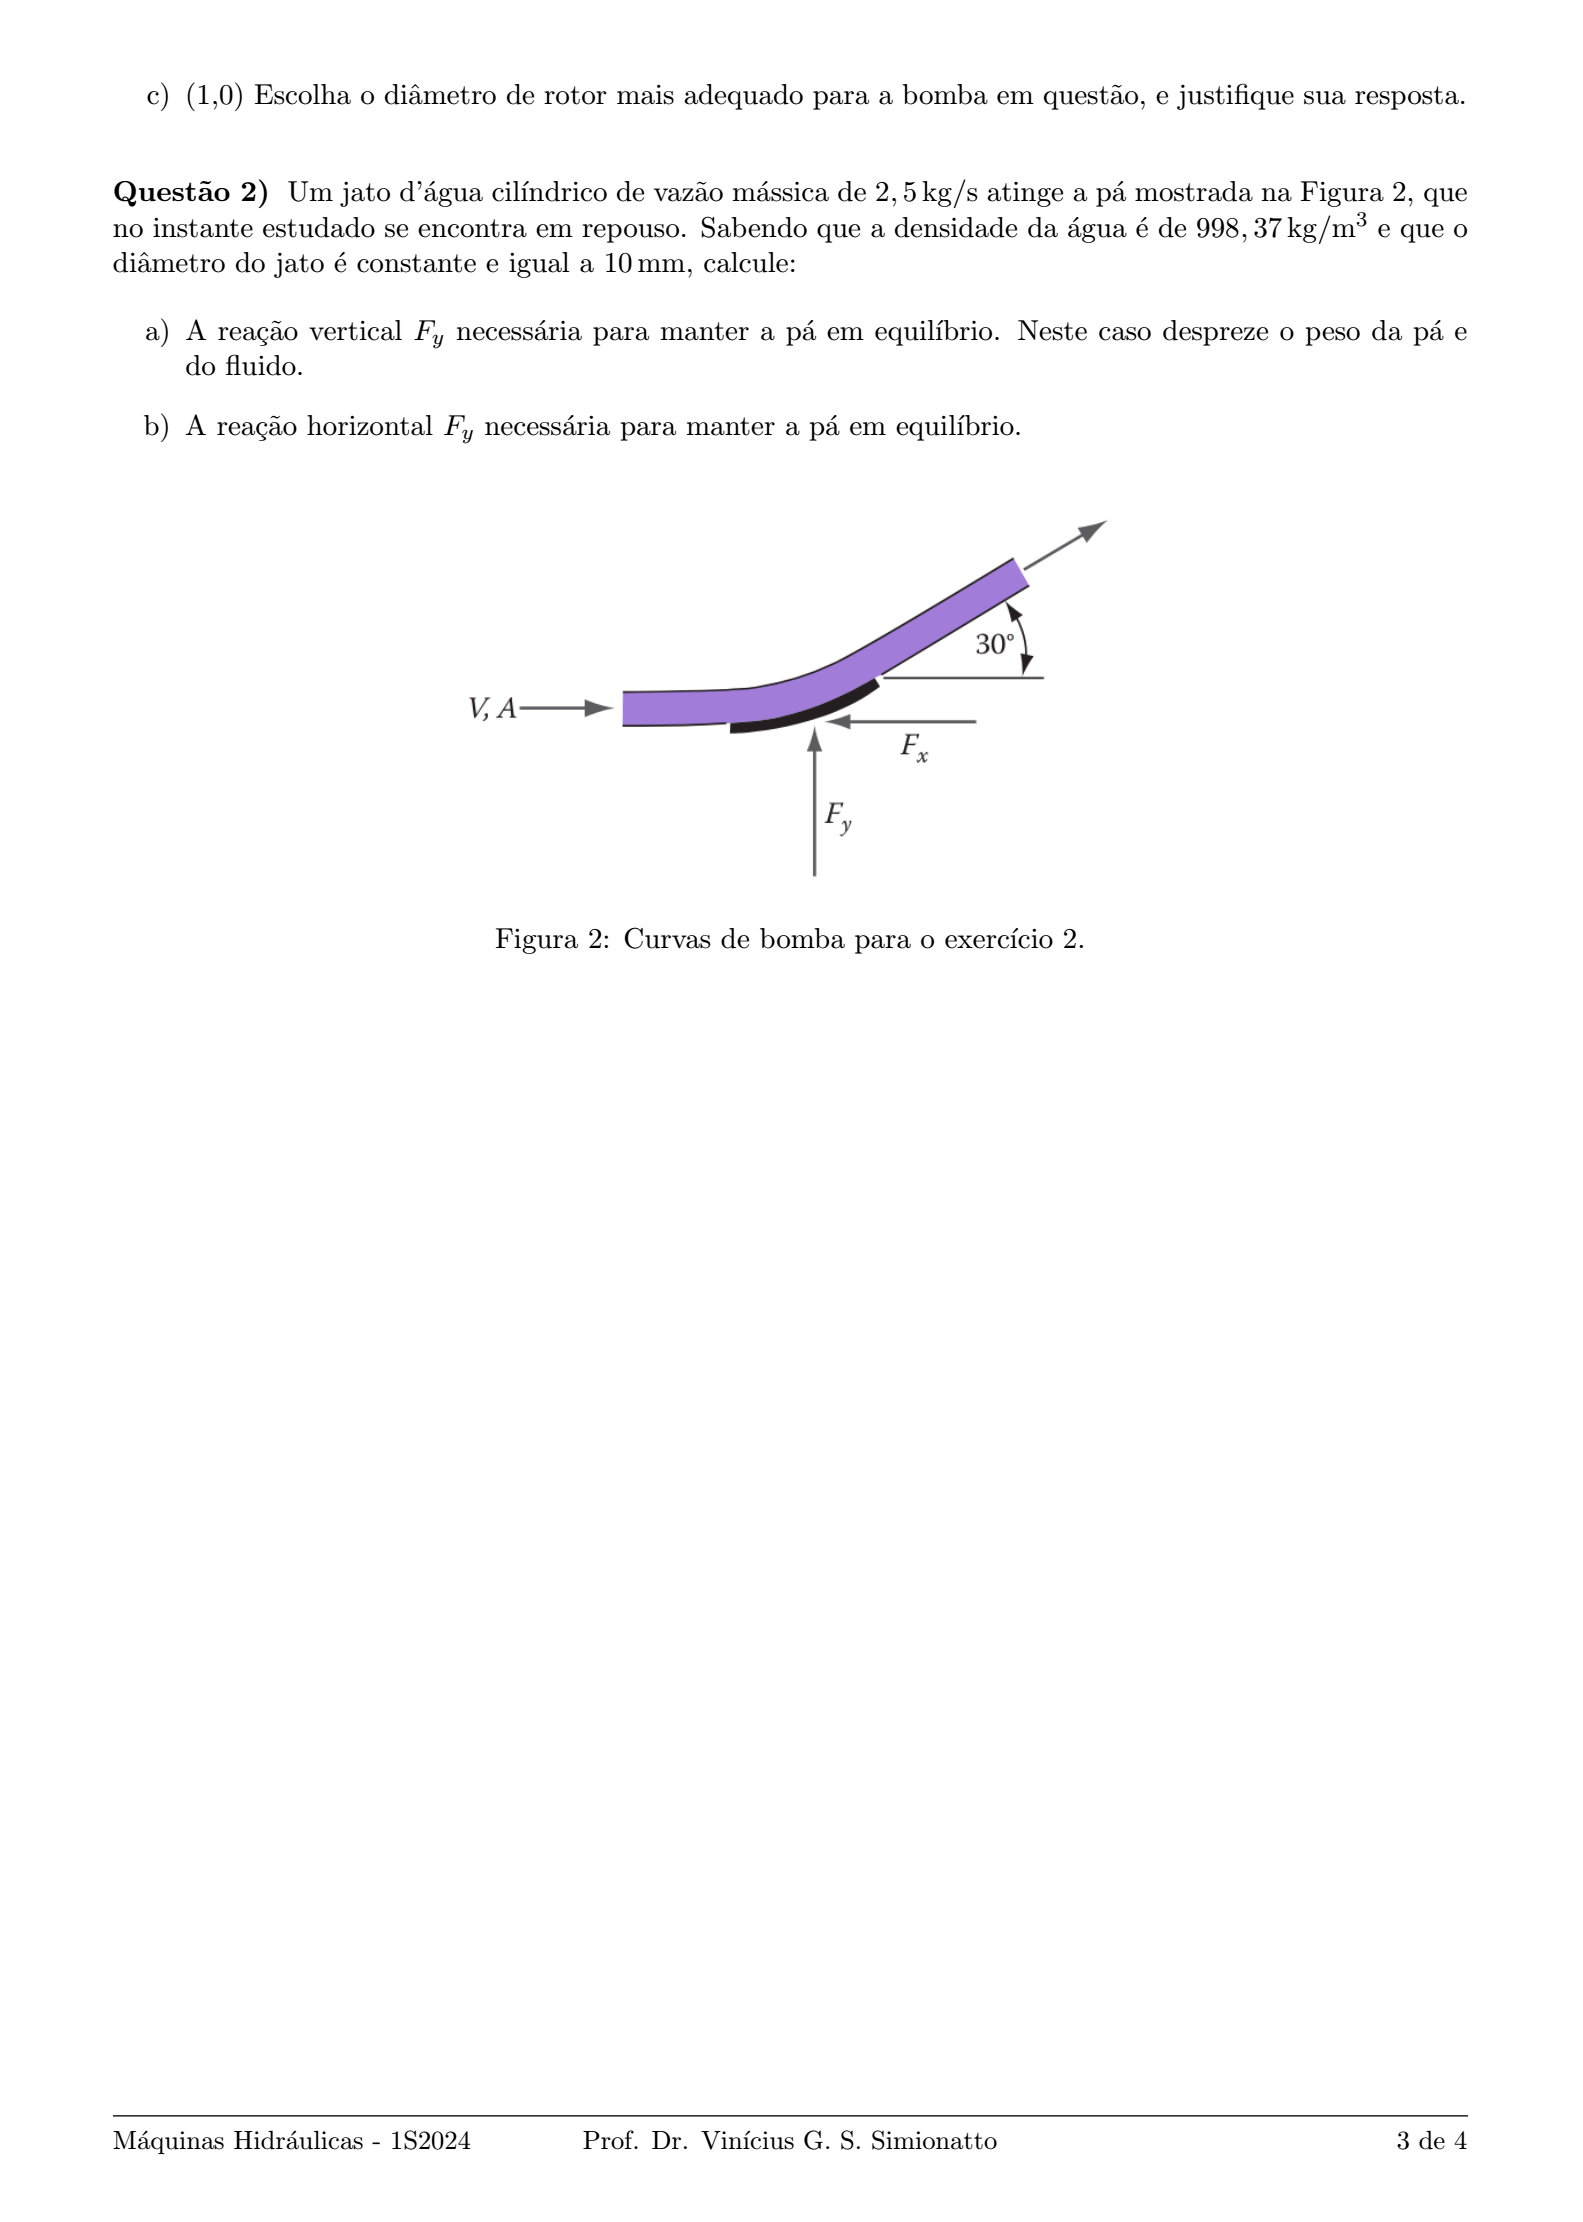

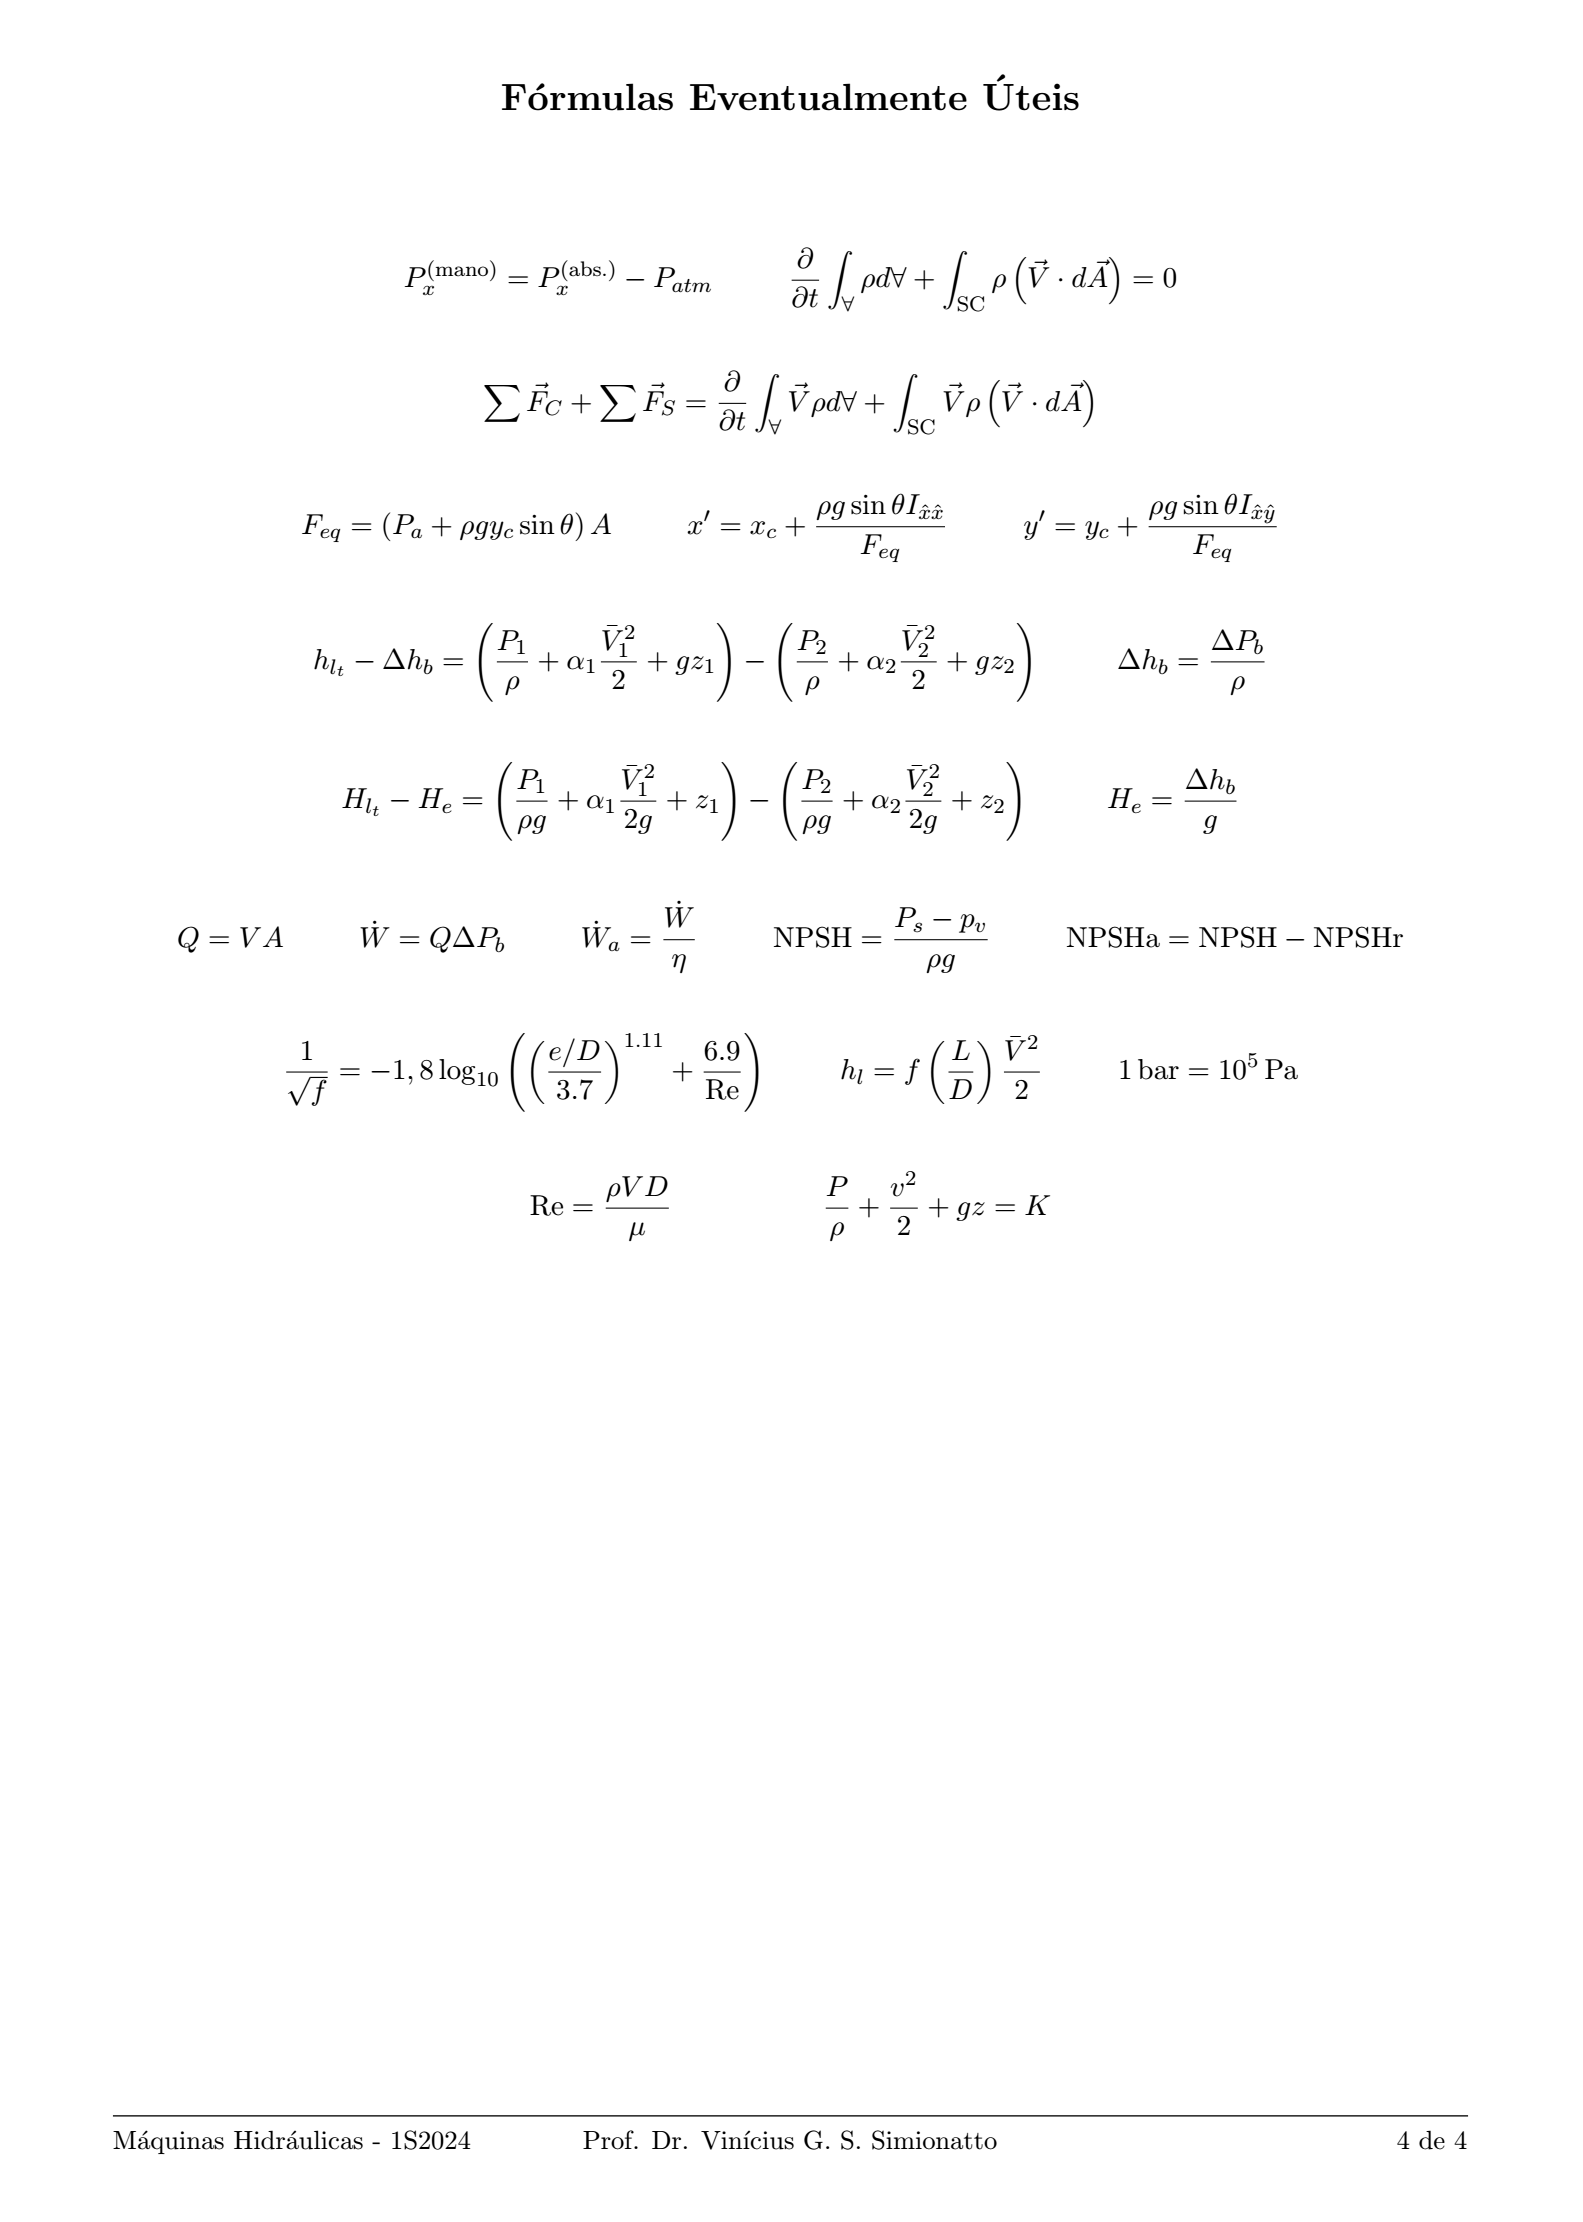

### Questão 1 a)

Para calcular a vazão manométrica requerida, basta calcular o termo $H_e$ diretamente da fórmula:

$$
H_{lt} - H_e = \left(\frac{P_1}{\rho g} + \alpha_1 \frac{\bar{V}_1^2}{2g} + z_1\right) - \left(\frac{P_2}{\rho g} + \alpha_2 \frac{\bar{V}_2^2}{2g} + z_2\right)
$$

A partir dos dados do enunciado, pode-se avaliar o sistema colocando o ponto 1 o nível do reservatório de sucção e o 2 no nível do reservatório de descarga. Tomando o nível do reservatório 1 como referência de elevação:

*   $P_1 = P_2 = P_{atm}$
*   $\bar{V}_1 = \bar{V}_2 = 0$
*   $z_1 = 0$
*   $z_2 = h = 39\,\mathrm{m}$

Assim, a equação se torna:
$$
H_e = H_{lt} + h
$$

A equação da perda de carga deve englobar as perdas de carga da tubulação e da descarga. Assim:

$$
H_{lt} = f\left(\frac{L_s}{D}\right) \frac{V^2}{2g} + K_s \frac{V^2}{2g} + f\left(\frac{L_d}{D}\right) \frac{V^2}{2g} + K_d \frac{V^2}{2g}
$$

Ou seja:
$$
H_{lt} = \left(f\left(\frac{L_s+L_d}{D}\right) + K_s + K_d\right) \frac{V^2}{2g}
$$

Ou em função da vazão:
$$
H_{lt} = \left(f\left(\frac{L_s+L_d}{D}\right) + K_s + K_d\right) \frac{Q^2}{2gA^2}
$$

Finalmente, temos:
$$
H_e = \left(f\left(\frac{L_s+L_d}{D}\right) + K_s + K_d\right) \frac{Q^2}{2gA^2} + h = \phi Q^2 + h
$$

A expressão com os valores numéricos substituídos é mostrada a seguir:

In [ ]:
from numpy import pi

# Dados:

rho = 991.81   # kg/m³
mu = 6.55e-4   # Pa.s
pv = 7425      # Pa

g = 9.81       # m/s²
Patm = 98.7e3  # Pa

Ls = 20        # m
Ld = 380       # m
D = 0.15       # m

f = 0.005      # ---
zs = -1        # m
zd = h = 39    # m

Ks = 1         # ---
Kd = 3         # ---

A = pi*(D**2)/4

phi = (f*(Ls+Ld)/D + Ks + Kd)/(2*g*(A**2))

print(f'He = {phi:.2f}.Q² + {h:.1f}')

He = 2829.03.Q² + 39.0


### Questão 1 b)

Para resolver este exercício, bastava, com a fórmula encontrada no item anterior, plotar alguns valores sobre o gráfico e verificar onde o $H_e$ _requerido_ pela tubulação cruzaria com o _fornecido_ pela bomba nos 4 diâmetros.

Observa-se alguns dos valores na tabela a seguir:

In [ ]:
import numpy as np
from pandas import DataFrame

Qv = np.asarray([0.005*x for x in range(16)])

Hev = np.asarray(list(map(lambda Q : phi*(Q**2)+h, Qv)))

dfdata = np.append(Qv.reshape(16,1),Hev.reshape(16,1),1)

df = DataFrame(data=dfdata, columns=['Vazão [m³/s]','He (req.) [m]'])
df

,Vazão [m³/s],He (req.) [m]
0,0.000,39.000000
1,0.005,39.070726
2,0.010,39.282903
3,0.015,39.636533
4,0.020,40.131614
5,0.025,40.768147
6,0.030,41.546131
7,0.035,42.465568
8,0.040,43.526456
9,0.045,44.728795


Estes pontos podem ser representados sobre a figura fornecida, gerando o seguinte diagrama:

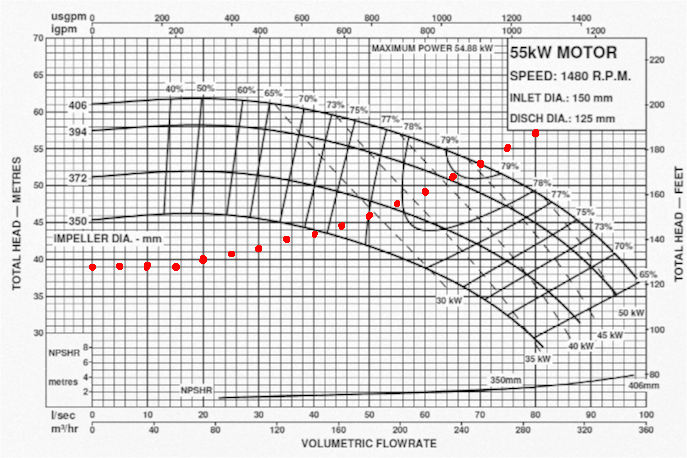

Estes cruzamentos geram os seguintes dados visualmente aproximados:

$$
\begin{array}{cccc}
\mathrm{Diam.\,[mm]} & Q \,\mathrm{[m^3/s]} & H_e \,\mathrm{[m]} & \eta\,\mathrm{[\%]} \\ \hline \hline
350 & 0,042 & 43,5 & 75,5\phantom{\,+}\\
372 & 0,054 & 47,0 & 77,5\phantom{\,+}\\
394 & 0,064 & 51,0 & 78,8\phantom{\,+}\\
406 & 0,070 & 53,0 & 79,0\,+\\ \hline
\end{array}
$$

### Questão 1 c)

Com os dados do exercício anterior, escolhe-se o diâmetro de $406\,\mathrm{mm}$, pois nele se tem a maior eficiência hidráulica.

### Questão 2)

Para solucionar este problema, deve-se primeiro definir o volume de controle para análise. Escolhe-se o volume de controle mostrado no diagrama a seguir:

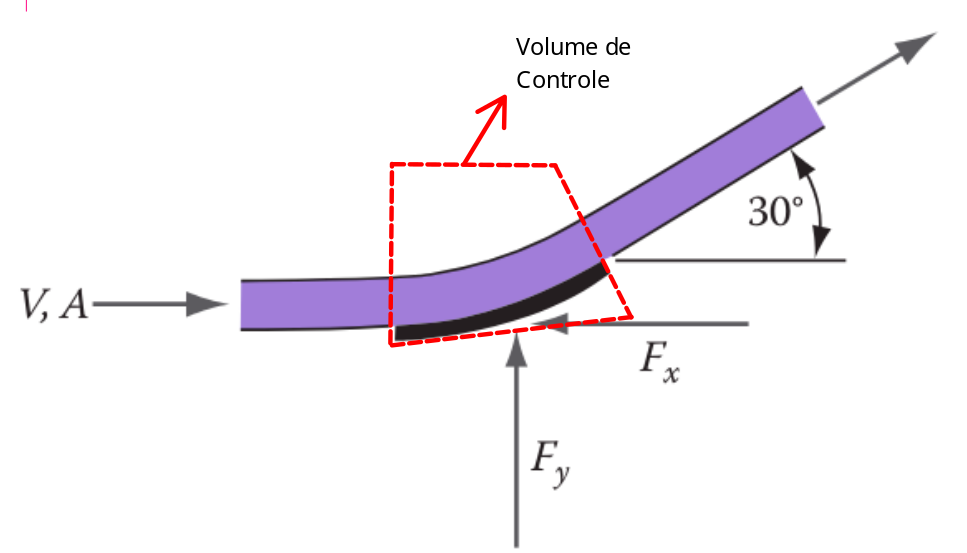

Conhecendo o volume de controle, uma vez que se deseja calcular os esforços que mantém a pá em repouso, é necessário utilizar o princípio da conservação da quantidade de movimento:

$$
\sum \vec{F}_c + \sum \vec{F_s} = \frac{\partial}{\partial t} \int_\forall \vec{V} \rho d\forall + \int_{SC} \vec{V} \rho \left(\vec{V} \cdot d\vec{A}\right)
$$

Pode-se aplicar este princípio em cada uma das direções separadamente. Para isso adotamos o eixo $x$ horizontal e positivo para a direita e o eixo $y$ vertical e positivo para cima.



### Questão 2 a)

Na vertical, temos:

*   $F_{cy} = 0$, pois o exercício pede para que se despreze a força peso do fluido no volume de controle e da própria pá.
*   $F_{sy} = F_y$, pois a única força de superfície é a reação vertical que mantém a pá em repouso.
*   $\displaystyle \frac{\partial}{\partial t} \int_\forall V_y \rho d\forall = 0$, pois este termo representa a massa interna ao volume de controle, multiplicada pela velocidade em $y$ de cada partícula. Neste caso a massa é constante, pois o sistema está em regime, e a velocidade é constante e nula. Assim, a variação desta integral é nula.

A integral de superfície deve ser dividida em duas partes, uma referente à entrada do fluido no volume de controle, chamada de "1" e uma referente à saída do fluido do volume de controle, chamada de "2". Assim:

$$
\int_{SC} V_y \rho \left(\vec{V} \cdot d\vec{A}\right) = \int_{SC_1} V_y \rho \left(\vec{V} \cdot d\vec{A}\right) + \int_{SC_2} V_y \rho \left(\vec{V} \cdot d\vec{A}\right)
$$

Na primeira superfície de controle, a entrada do fluido é inteiramente horizontal, ou seja, $V_y = 0$. Assim:

$$
\int_{SC_1} V_y \rho \left(\vec{V} \cdot d\vec{A}\right) = 0
$$

Já na segunda, o fluido sai do volume de controle, e por isso $\int \vec{V} \cdot d\vec{A} = +VA$. Já a velocidade $V_y$ é dada por $V\sin 30^\circ$. Portanto:

$$
\int_{SC_2} V_y \rho \left(\vec{V} \cdot d\vec{A}\right) = \rho V\sin 30^\circ (+VA) = \rho V^2 A \sin 30^\circ  
$$

Sabemos que $\dot{m} = \rho V A$, e conhecemos o diâmetro $D$ do jato, que podemos aproximar por constante na entrada e na saída da pá. Portanto:

$$
\dot{m} = \rho V A = \rho V \left(\frac{\pi D^2}{4}\right) \hspace{10mm} \therefore \hspace{10mm} V = \frac{4\dot{m}}{\rho \pi D^2}
$$

Substituindo todos os resultados no princípio da conservação da quantidade de movimento:

$$
F_y = \rho V^2 A \sin 30^\circ = \frac{4\dot{m}^2}{\rho \pi D^2} \sin 30^\circ
$$

O valor de $F_y$ é calculado a seguir:

In [ ]:
%reset -f

from numpy import pi, sin

# Dados

rho = 998.37  # kg/m³
dm = 2.5  # kg/s
D = 0.01  # m

Fy = (4*(dm**2)/(rho*pi*(D**2)))*sin(30*pi/180)
# O seno é implementado em radianos na biblioteca numpy

print(f'Fy = {Fy:.4f} N')

Fy = 39.8537 N


### Questão 2 b)

Na horizontal, temos:

*   $F_{cx} = 0$, pois não há forças de corpo na direção $x$
*   $F_{sx} = -F_x$, pois a única força de superfície na horizontal é a reação sobre a pá.
*   $\displaystyle \frac{\partial}{\partial t} \int_\forall V_x \rho d\forall = 0$, pois este termo representa a massa interna ao volume de controle, multiplicada pela velocidade em $x$ de cada partícula. Neste caso a massa é constante, pois o sistema está em regime, e a velocidade é constante e nula. Assim, a variação desta integral é nula.

A integral de superfície deve ser dividida em duas partes, uma referente à entrada do fluido no volume de controle, chamada de "1" e uma referente à saída do fluido do volume de controle, chamada de "2". Assim:

$$
\int_{SC} V_x \rho \left(\vec{V} \cdot d\vec{A}\right) = \int_{SC_1} V_x \rho \left(\vec{V} \cdot d\vec{A}\right) + \int_{SC_2} V_x \rho \left(\vec{V} \cdot d\vec{A}\right)
$$

No caso da superfície de controle "1", o fluido entra no volume de controle, e por isso $\int \vec{V}\cdot d\vec{A} = -VA$. Se a velocidade do fluido for aproximadamente constante em toda superfície de controle pela qual o fluido passa, então:

$$
\int_{SC_1} V_x \rho \left(\vec{V} \cdot d\vec{A}\right) = (V) \rho (-VA) = -\rho V^2 A
$$

Na segunda superfície de controle, o fluido sai pela superfície, e assim $\int \vec{V}\cdot d\vec{A} = +VA$. Além disso, neste caso, $V_x = V\cos 30^\circ$. Portanto:

$$
\int_{SC_2} V_x \rho \left(\vec{V} \cdot d\vec{A}\right) = (V\cos 30^\circ) \rho (+VA) = \rho V^2 A \cos 30^\circ
$$

Portanto, na direção $x$ o princípio da conservação da quantidade de movimento rende:

$$
-F_x = -\rho V^2 A + \rho V^2 A \cos 30^\circ
$$

$$
\therefore \hspace{5mm} F_x = \rho V^2 A (1-\cos 30^\circ)
$$

Sabe-se que $Q = VA$ e $\dot{m} = \rho V A$. Portanto, pode-se escrever a força na forma:

$$
F_x = \dot{m} V (1-\cos 30^\circ)
$$

Uma vez que temos o diâmetro do jato, podemos relacioná-lo com a vazão volumétrica para calcular a velocidade $V$, que é o único parâmetro desconhecido na fórmula obtida para $F_x$. Assim:

$$
\dot{m} = \rho V A = \rho V \left(\frac{\pi D^2}{4}\right) \hspace{10mm} \therefore \hspace{10mm} V = \frac{4\dot{m}}{\rho \pi D^2}
$$

E, finalmente:

$$
F_x = \frac{4\dot{m}^2}{\rho \pi D^2} (1-\cos 30^\circ)
$$

O valor para $F_x$ é mostrado a seguir:

In [ ]:
from numpy import cos

Fx = (4*(dm**2)/(rho*pi*(D**2)))*(1-cos(30*pi/180))
# O cosseno é implementado em rad na biblioteca numpy

print(f'Fx = {Fx:.4f} N')

Fx = 10.6788 N
